In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar10 as data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import random
from tensorflow.keras.layers import BatchNormalization, Dropout

In [2]:
import pandas as pd
#immport data
data_frame = pd.read_excel("01train.xlsx")
data_frame.head()

,手機螢幕溫度(平均),手機螢幕溫度(最大),手機背蓋溫度(平均),平均APP運作指標/小時,充電時間指標,手機電池電量,CPU跑分階級,手機外殼/包膜指標,外型平均曲率,上網頻率指標,通話頻率指標,新機/二手/老舊,內容容量比率,CPU效能等級,Underclocking
0,58.785714,63.833333,43.213333,231.000000,0.039474,61.255411,3,0.053652,-0.037180,6235.000000,6029.000000,0,0.999244,1,0
1,52.357143,57.857143,58.053333,92.090000,0.732759,91.393846,4,0.074205,0.155243,1750.000000,1422.000000,0,0.950294,2,1
2,30.674860,36.714286,36.661527,836.239303,0.229050,68.931202,3,0.121504,0.031717,2679.476981,2200.824592,0,1.000000,1,0
3,32.119048,41.571429,63.213333,588.800000,0.090909,54.455267,3,0.153716,0.009326,362.900000,0.000000,0,0.918970,1,1
4,41.214286,49.404762,52.486667,683.900000,0.072727,61.922799,3,0.097287,-0.030090,2777.000000,2001.000000,0,0.906411,1,0


In [3]:
import pandas as pd

y_data = data_frame['Underclocking'].to_numpy()

feature_ex = ['手機螢幕溫度(平均)','手機背蓋溫度(平均)', '平均APP運作指標/小時','充電時間指標', '手機電池電量','CPU跑分階級', '上網頻率指標','平均APP運作指標/小時']
x_data = data_frame[feature_ex].to_numpy()






In [4]:
#data arrange
from sklearn.preprocessing import MinMaxScaler, StandardScaler
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()



x_data_normalized = min_max_scaler.fit_transform(x_data)
x_data_standardized = standard_scaler.fit_transform(x_data_normalized)
print(x_data_standardized)

[[ 1.36196208 -0.14775948 -0.59333444 ... -0.46710526  2.01233951
  -0.59333444]
 [ 0.91979281  0.08133125 -0.78703283 ...  0.99372152 -0.43924433
  -0.78703283]
 [-0.57155551 -0.24890221  0.25062121 ... -0.46710526  0.06882496
   0.25062121]
 ...
 [-1.3686788  -0.17215054 -0.75146126 ... -0.46710526 -1.34191914
  -0.75146126]
 [ 0.10751149  0.0796846  -0.54508763 ... -0.46710526  0.56544042
  -0.54508763]
 [ 1.30791917  0.02164005  2.85784632 ...  0.99372152  1.34819807
   2.85784632]]


In [5]:
from sklearn.model_selection import train_test_split
# 使用 train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(x_data_standardized, y_data, test_size=0.15, random_state=1)

print("Xtrain shape:", Xtrain.shape)
print("Xtrain type:", type(Xtrain))
print("Xtest shape:", Xtest.shape)
print("Xtest type:", type(Xtest))
print("ytrain shape:", ytrain.shape)
print("ytrain type:", type(ytrain))
print("ytest shape:", ytest.shape)
print("ytest type:", type(ytest))

Xtrain shape: (3317, 8)
Xtrain type: <class 'numpy.ndarray'>
Xtest shape: (586, 8)
Xtest type: <class 'numpy.ndarray'>
ytrain shape: (3317,)
ytrain type: <class 'numpy.ndarray'>
ytest shape: (586,)
ytest type: <class 'numpy.ndarray'>


In [6]:

import tensorflow as tf
l2_regularizer = tf.keras.regularizers.l2(0.1)
input_features = x_data.shape[1]
print( x_data.shape[1])
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_features,)),
    tf.keras.layers.Dense(16, activation='leaky_relu'),
    tf.keras.layers.Dense(8, activation='leaky_relu'),
    tf.keras.layers.Dense(4, activation='leaky_relu'),
    tf.keras.layers.Dense(2, activation='leaky_relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),  
])
model.summary()



8


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 329 (1.29 KB)

 Trainable params: 329 (1.29 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(Xtrain, ytrain, batch_size=512, epochs=100,validation_split=0.1 ) #default batch=32
print(history.history.keys())


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5651 - loss: 0.6833 - val_accuracy: 0.6175 - val_loss: 0.6735
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5915 - loss: 0.6733 - val_accuracy: 0.5813 - val_loss: 0.6630
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5971 - loss: 0.6648 - val_accuracy: 0.5994 - val_loss: 0.6468
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6047 - loss: 0.6572 - val_accuracy: 0.6084 - val_loss: 0.6436
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6034 - loss: 0.6537 - val_accuracy: 0.5904 - val_loss: 0.6496
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6163 - loss: 0.6508 - val_accuracy: 0.5964 - val_loss: 0.6387
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6318 - loss: 0.6410 - val_accuracy: 0.6175 - val_loss: 0.6470
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6234 - loss: 0.6477 - val_accuracy: 0.6355 - val_loss: 0.6234

In [8]:
results = model.evaluate(Xtest, ytest)
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.6592 - loss: 0.6191
Final test set loss: 0.642476
Final test set accuracy: 0.639932


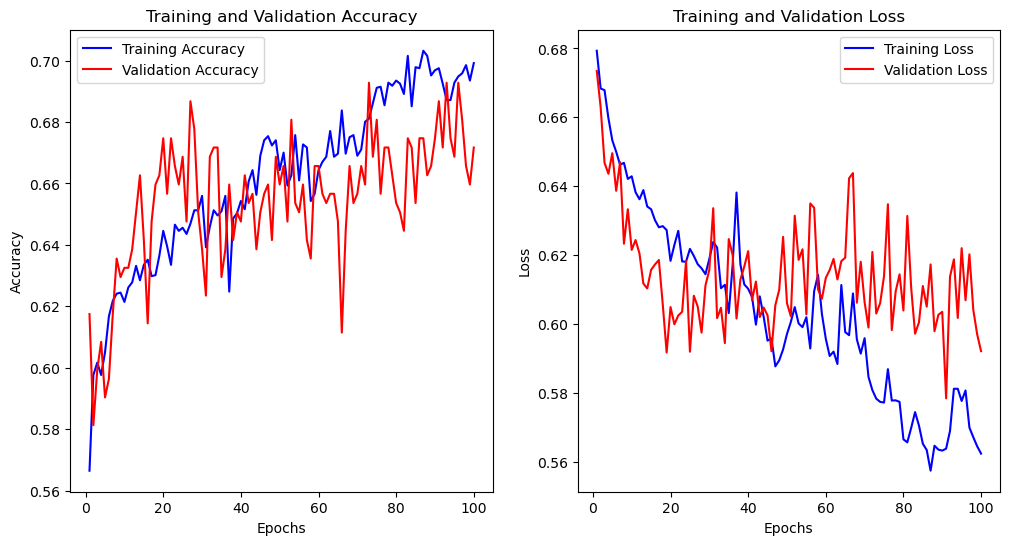

In [9]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_ = range(1,len(acc)+1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_, acc, 'b-', label='Training Accuracy')
plt.plot(epochs_, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_, loss, 'b-', label='Training Loss')
plt.plot(epochs_, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()